In [139]:
#Import some libraries
import pandas as pd
import re
from pylab import rcParams
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
import lightgbm as lgb
import seaborn as sns
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings("ignore")
%matplotlib inline

In [140]:
#import data
train = pd.read_csv('Train.csv')
test=  pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [141]:
train.head(15)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,NO,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,NO,31,NaN,NaN,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,NO,45,On-net 500F_FNF;3d,8.0,0


In [142]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [143]:
train.shape

(2154048, 19)

In [144]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [145]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [146]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [147]:
missing_values_table(train)

Your selected dataframe has 19 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
ZONE2,2017224,93.6
ZONE1,1984327,92.1
TIGO,1290016,59.9
DATA_VOLUME,1060433,49.2
TOP_PACK,902594,41.9
FREQ_TOP_PACK,902594,41.9
ORANGE,895248,41.6
REGION,849299,39.4
ON_NET,786675,36.5
MONTANT,756739,35.1


In [148]:
train=train.dropna(subset=['TOP_PACK','MONTANT','REVENUE'])
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,0.0,2.0,12.0,3.0,NaN,NaN,NO,12,All-net 500F=2000F;5d,2.0,0
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,0.0,57.0,1.0,NaN,2.0,NaN,NO,21,All-net 500F=2000F;5d,2.0,0
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,7400.0,2.0,12.0,NaN,NaN,0.0,NO,62,"Data:1000F=2GB,30d",3.0,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0


In [149]:
missing_values_table(train)

Your selected dataframe has 19 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
ZONE2,1124512,90.4
ZONE1,1091816,87.8
TIGO,440047,35.4
DATA_VOLUME,367273,29.5
REGION,248116,19.9
ORANGE,119395,9.6
ON_NET,103845,8.3


In [150]:
def ChekChurn(Train,data1,data2,data3):
 count= len(train.index)
 index_to_keep=[]
 for i in range(count):
     if (data1[i]-data2[i])<0:
         if data3[i]!=1:
            index_to_keep.append(i)
     else:
         if data3[i]!=0:
             index_to_keep.append(i) 
 Train =Train.take(list(index_to_keep))
 return Train


In [151]:
def New(data):
 data['REVENUE-MONTANT'] = data['REVENUE'] - data['MONTANT']
 data['REVENUE/MONTANT'] = data['REVENUE'] / data['MONTANT']


In [152]:
test.drop(columns=[ 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2'], inplace=True)
train.drop(columns=[ 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2'], inplace=True)

In [153]:
for column in train.select_dtypes(include=['int64', 'float64']).columns:
    train[column].fillna((train[column].mean()), inplace=True)

In [154]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0


In [155]:
New(test)
New(train)

In [156]:
#train=ChekChurn(train,train['REVENUE'].tolist(),train['MONTANT'].tolist(),train['CHURN'].tolist())

In [157]:
result = train.groupby('TOP_PACK').agg('count')
result = result.sort_values(by='user_id', ascending=False)

val1 = result[(result['user_id'] >= 7000)]
val1 = val1['user_id']
result = result[result['user_id'] < 7000]
val2 = result[(result['user_id'] >= 1000)]
val2 = val2['user_id']
result = result[result['user_id'] < 1000]
val3 = result[(result['user_id'] >= 100)]
val3 = val3['user_id']
result = result[result['user_id'] < 100]
val4 = result[(result['user_id'] >= 1)]
val4 = val4['user_id']

All-net 500F=2000F;5d                  316300
On net 200F=Unlimited _call24H         151713
Data:490F=1GB,7d                       114771
Data: 100 F=40MB,24H                    84322
Mixt 250F=Unlimited_call24H             67130
                                        ...  
NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE         1
Data_Mifi_10Go_Monthly                      1
1500=Unlimited7Day                          1
FIFA_TS_weekly                              1
GPRS_5Go_7D_PORTAL                          1
Name: TOP_PACK, Length: 137, dtype: int64


Text(0.5, 0, 'TOP_PACK')

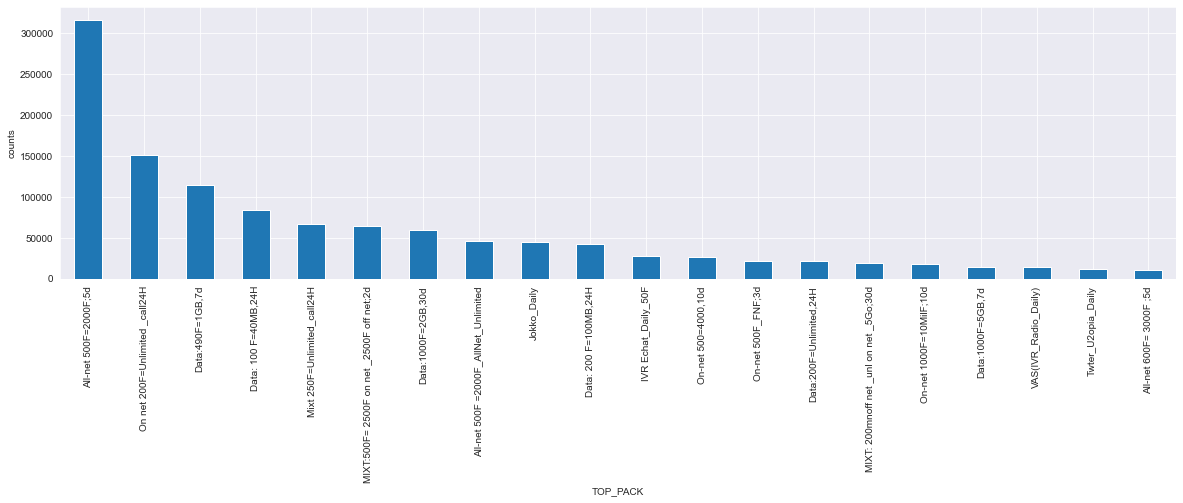

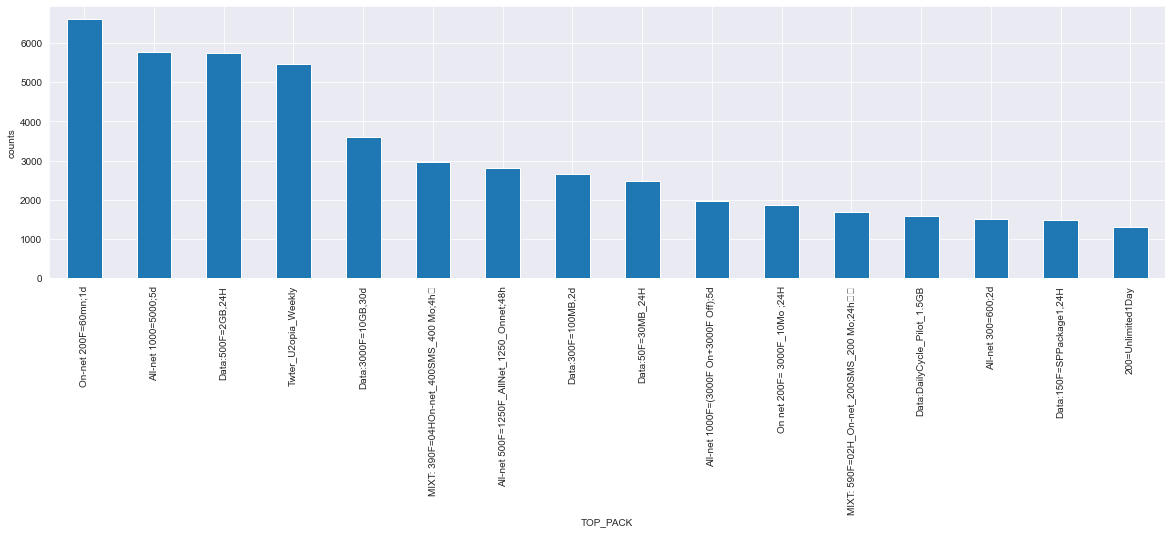

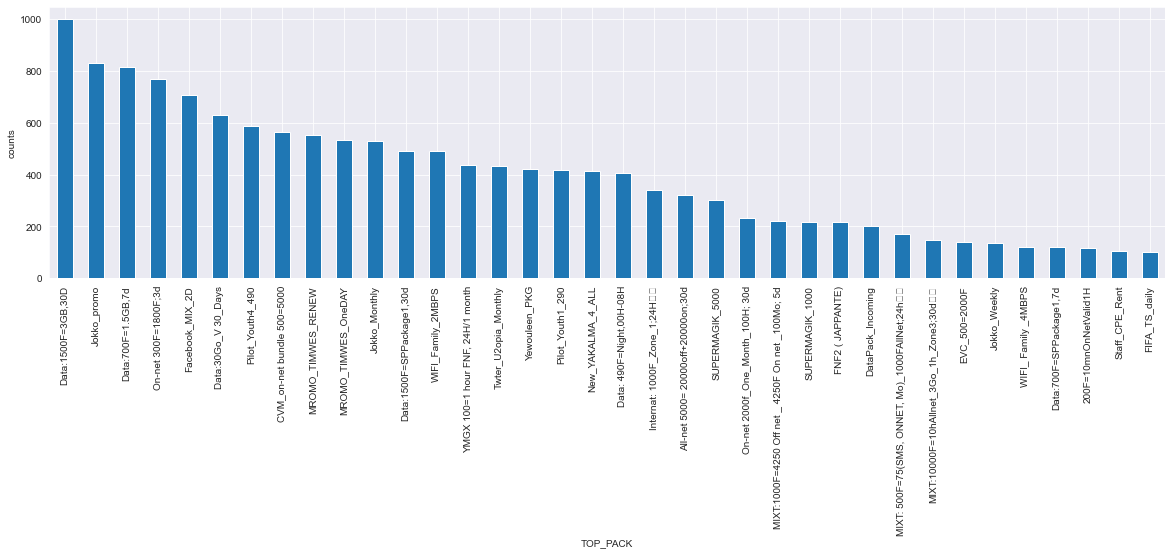

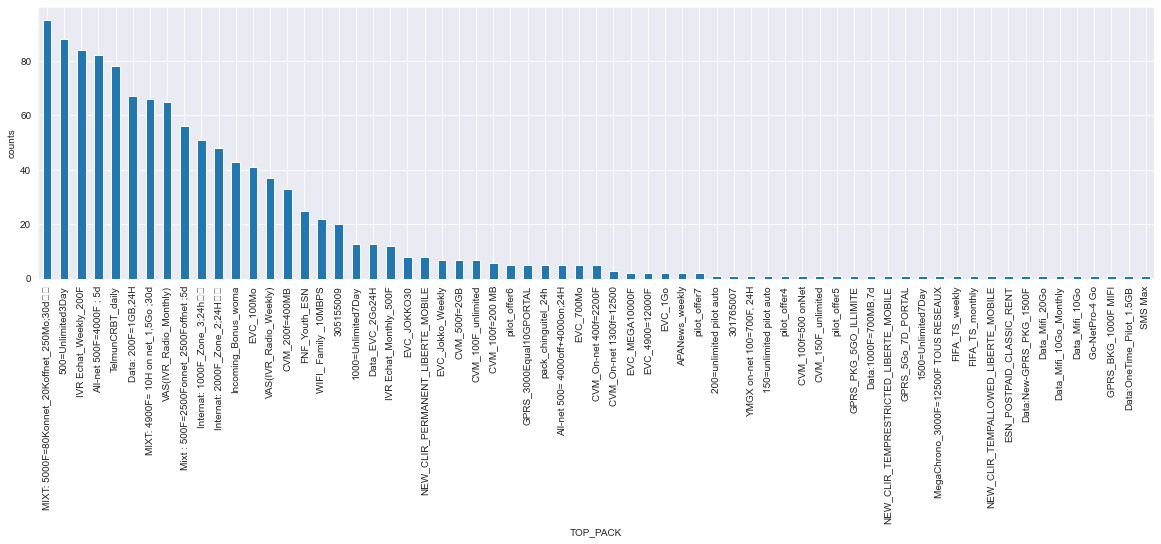

In [158]:
print(train['TOP_PACK'].value_counts())

plt.figure(figsize=(20,5))
val1.plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

plt.figure(figsize=(20,5))
val2.plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

plt.figure(figsize=(20,5))
val3.plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

plt.figure(figsize=(20,5))
val4.plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

In [159]:
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REVENUE-MONTANT,REVENUE/MONTANT
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,NO,54,On net 200F=Unlimited _call24H,8.0,0,1.0,1.000235
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NO,17,On-net 1000F=10MilF;10d,1.0,0,-2580.0,0.283333
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,NO,62,"Data:1000F=5GB,7d",11.0,0,2.0,1.000148
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0,-15.0,0.985000
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,500.0,1.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NO,12,All-net 500F=2000F;5d,2.0,0,0.0,1.000000
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,NO,21,All-net 500F=2000F;5d,2.0,0,-3.0,0.998500
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,NO,62,"Data:1000F=2GB,30d",3.0,0,0.0,1.000000
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,NO,55,"Data: 200 F=100MB,24H",9.0,0,-300.0,0.950820


In [160]:
def NewFeature(Train,data):
    count= len(Train.index)
    results=[]
    result_time=[]
    result_put=[]
    result_receipt=[]
    for i in range(count):
     result = re.findall(r'(^\w+)', data[i] )
     results.append(' '.join(result))
    Train['Name_Pack']= results
    for i in range(count):
     result1 = re.findall(r'\w+.$', data[i] )
     result_time.append(' '.join(result1))
    Train['Time']= result_time
    for i in range(count):
     result2 = re.findall(r'=(\w+).', data[i] )
     result_receipt.append(' '.join(result2))
    Train['Receipt']= result_receipt
    for i in range(count):
     result3 = re.findall(r'\d+\s\w=|\d+\w=', data[i] )
     result_put.append(' '.join(result3))
    Train['Put_in']= result_put

In [161]:

NewFeature(train,train.TOP_PACK.tolist())
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,NO,54,On net 200F=Unlimited _call24H,8.0,0,1.0,1.000235,On,_call24H,Unlimited,200F=
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NO,17,On-net 1000F=10MilF;10d,1.0,0,-2580.0,0.283333,On,10d,10MilF,1000F=
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,NO,62,"Data:1000F=5GB,7d",11.0,0,2.0,1.000148,Data,7d,5GB,1000F=
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0,-15.0,0.985000,Mixt,Unlimited_call24H,Unlimited_call24,250F=
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,500.0,1.058824,MIXT,2d,,500F=
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NO,12,All-net 500F=2000F;5d,2.0,0,0.0,1.000000,All,5d,2000F,500F=
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,NO,21,All-net 500F=2000F;5d,2.0,0,-3.0,0.998500,All,5d,2000F,500F=
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,NO,62,"Data:1000F=2GB,30d",3.0,0,0.0,1.000000,Data,30d,2GB,1000F=
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,NO,55,"Data: 200 F=100MB,24H",9.0,0,-300.0,0.950820,Data,24H,100MB,200 F=


In [162]:
train['Put_in'] = train.Put_in.replace(r'=','',regex=True)
train['Time'] = train.Time.replace(r'Unlimited_call|_call','',regex=True)
train.drop(columns=['TOP_PACK'], inplace=True)
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,MRG,REGULARITY,FREQ_TOP_PACK,CHURN,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,NO,54,8.0,0,1.0,1.000235,On,24H,Unlimited,200F
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NO,17,1.0,0,-2580.0,0.283333,On,10d,10MilF,1000F
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,NO,62,11.0,0,2.0,1.000148,Data,7d,5GB,1000F
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NO,11,2.0,0,-15.0,0.985000,Mixt,24H,Unlimited_call24,250F
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NO,62,18.0,0,500.0,1.058824,MIXT,2d,,500F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NO,12,2.0,0,0.0,1.000000,All,5d,2000F,500F
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,NO,21,2.0,0,-3.0,0.998500,All,5d,2000F,500F
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,NO,62,3.0,0,0.0,1.000000,Data,30d,2GB,1000F
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,NO,55,9.0,0,-300.0,0.950820,Data,24H,100MB,200 F


In [163]:
train.drop(columns=[  'MRG'], inplace=True)

## Machine Learning

In [164]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [165]:
encoder = LabelEncoder()
train["TENURE"] = encoder.fit_transform(train["TENURE"])
test["TENURE"] = encoder.fit_transform(test["TENURE"])
train["REGION"] = encoder.fit_transform(train["REGION"])
test["REGION"] = encoder.fit_transform(test["REGION"])
train["Name_Pack"] = encoder.fit_transform(train["Name_Pack"]) 
train["Time"] = encoder.fit_transform(train["Time"])
train["Receipt"] = encoder.fit_transform(train["Receipt"])




In [166]:
train=train.replace(r'','0',regex=True)
train=train.replace(r'F','',regex=True)
train=train.replace(r'f','',regex=True)
train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,CHURN,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
0,00000bd7d5001092811bc0c8d7b0d6e7c3596,2,7,4250.0,15.0,4251.0,1417.0,17.0,54,8.0,0,1.0,1.000235,59,10,41,200
2,00001654a9d996303d9969d0a4a851714a4bb57,14,7,3600.0,2.0,1020.0,340.0,2.0,17,1.0,0,-2580.0,0.283333,59,2,6,1000
3,00001dd6a457ba044bd5d84937be464ce78ac2,0,7,13500.0,15.0,13502.0,4501.0,18.0,62,11.0,0,2.0,1.000148,17,26,32,1000
4,000028d9e13a595abe0619b583d76ab907850,0,7,1000.0,1.0,985.0,328.0,1.0,11,2.0,0,-15.0,0.985000,54,10,45,250
5,0000296564272665ccd2925d377e1243306b01e,7,7,8500.0,17.0,9000.0,3000.0,18.0,62,18.0,0,500.0,1.058824,50,12,0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,b2b8b63959b8a374e2a2cca2b9e521879ad,14,7,1000.0,2.0,1000.0,333.0,2.0,12,2.0,0,0.0,1.000000,9,25,17,500
2154040,ccdae4d9097c2095e875c89845cab4e3,9,7,2000.0,4.0,1997.0,666.0,5.0,21,2.0,0,-3.0,0.998500,9,25,17,500
2154042,d3057e3119496a3c00397a9a67d5037c52,0,7,4800.0,4.0,4800.0,1600.0,14.0,62,3.0,0,0.0,1.000000,17,18,22,1000
2154044,eaaa9289cdba0ac0000ab4b484aa74ed15,12,7,6100.0,15.0,5800.0,1933.0,15.0,55,9.0,0,-300.0,0.950820,17,10,4,200


In [167]:
train["Put_in"] = encoder.fit_transform(train["Put_in"])

In [168]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1)
print(x.shape)
print(y.shape)
print(test.shape)

(1244121, 15)
(1244121,)
(380127, 13)


In [169]:
#Split training data into train and test split

In [170]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,train_size=0.9)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1119708, 15)
(1119708,)
(124413, 15)
(124413,)


In [171]:
#Further split X_train and y_train into train and validation sets

In [172]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 1/9, train_size=8/9)

In [173]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(995296, 15)
(995296,)
+++++++
test
(124413, 15)
(124413,)
+++++++
validation
(124412, 15)
(124412,)


In [174]:
#Standardize numeric columns

In [175]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'REGULARITY','FREQ_TOP_PACK']

In [176]:
scaler = StandardScaler()

In [177]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [178]:
X_train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
856799,12,4,-0.768484,-0.855280,-0.752667,-0.752535,-0.759649,-1.343593,-0.677146,150.0,1.300000,17,10,4,9
741082,12,7,-0.768484,-0.855280,-0.773051,-0.772920,-0.959438,-0.154918,-0.677146,0.0,1.000000,9,25,17,18
783137,14,7,-0.008619,-0.192824,-0.022494,-0.022361,-0.027088,-0.154918,-0.432703,23.0,1.003833,9,25,17,18
1252969,7,7,-0.077698,-0.192824,-0.094383,-0.094522,-0.226877,0.439420,-0.106780,-6.0,0.998909,17,26,14,15
911458,0,7,0.557826,1.500116,0.468637,0.468499,1.304841,0.817635,-0.432703,-463.0,0.954158,17,26,14,15


In [179]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [180]:
X_test.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
129696,0,7,1.478558,0.538383,1.498636,1.498772,0.305723,0.926911,0.131425,499.0,1.029791,17,26,14,15
322741,0,7,1.693244,1.855930,1.707756,1.707620,2.169580,1.142767,0.929277,490.0,1.026776,17,26,14,15
1094225,7,7,-0.702930,-0.852361,-0.706415,-0.706556,-0.959037,-0.206336,-0.586641,0.0,1.000000,9,25,17,18
2007360,12,7,-0.564423,0.245595,-0.570711,-0.570581,0.039458,0.225377,0.290996,0.0,1.000000,17,10,28,2
333596,12,7,1.042260,0.904368,1.071305,1.071304,0.705121,1.142767,1.248417,500.0,1.036765,50,12,0,18


In [181]:
test[num_cols] = scaler.fit_transform(test[num_cols])

In [182]:
test.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT
0,12,7,-0.073768,-0.492335,-0.069448,-0.069311,-0.611355,NO,0.624445,On-net 1000F=10MilF;10d,-0.347349,0.0,1.000000
1,14,5,-0.734223,-0.718875,-0.719058,-0.718923,-0.747850,NO,0.579580,"Data: 100 F=40MB,24H",-0.673377,26.0,1.086667
2,0,7,-0.312656,1.017929,-0.291822,-0.291964,0.821834,NO,1.297421,"Data: 100 F=40MB,24H",1.038271,100.0,1.030303
3,14,7,NaN,NaN,NaN,NaN,NaN,NO,-0.856101,NaN,NaN,NaN,NaN
4,14,7,NaN,NaN,NaN,NaN,NaN,NO,-0.811236,NaN,NaN,NaN,NaN


In [183]:
X_val[num_cols] = scaler.fit_transform(X_val[num_cols])

In [184]:
X_val.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
1848212,9,7,-0.182709,0.466268,-0.251149,-0.251289,0.236213,0.437541,-0.597497,-399.0,0.916000,17,10,4,9
1766941,2,7,3.910825,3.332610,4.523961,4.523834,3.035869,1.140147,1.685679,5000.0,1.145781,9,25,17,18
785689,0,7,0.267541,0.172285,0.451993,0.452129,0.236213,0.329448,0.381007,1497.0,1.187125,46,60,0,0
1690009,4,7,2.685037,3.112123,2.658981,2.659122,2.835893,1.086101,2.174931,199.0,1.007819,46,60,0,0
1819245,11,7,-0.362809,0.172285,-0.345293,-0.345160,0.369530,0.978008,0.217923,212.0,1.061449,59,10,41,8


In [185]:
##RandomForestClassifier Model

In [186]:
rand = lgb.LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 24,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300)

In [187]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.0004912993970392775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004912993970392775
[LightGBM] [Warning] bagging_fraction is set=0.9540416539312312, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9540416539312312
[LightGBM] [Warning] lambda_l2 is set=9.424350138808432, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.424350138808432
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In [188]:
randmodel

LGBMClassifier(bagging_fraction=0.9540416539312312, bagging_freq=7,
               feature_fraction=1.0, lambda_l1=0.0004912993970392775,
               lambda_l2=9.424350138808432, metric='auc', min_child_samples=100,
               n_estimators=300, num_leaves=24, objective='binary')

In [189]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)
randpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [190]:
print("Acuracy")
accuracy_score(y_test, randpred)

Acuracy


0.9615554644611094

In [191]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.10462981847848256

In [192]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.17662248235496644

In [193]:
confusion_matrix(y_test, randpred)

array([[119117,    393],
       [  4390,    513]], dtype=int64)

In [194]:
test.drop(columns=[ 'MRG'], inplace=True)

In [195]:
for column in test.select_dtypes(include=['int64', 'float64']).columns:
    test[column].fillna((test[column].mean()), inplace=True)

In [196]:
test.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,TOP_PACK,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT
0,12,7,-7.376844e-02,-4.923350e-01,-6.944753e-02,-6.931100e-02,-6.113553e-01,0.624445,On-net 1000F=10MilF;10d,-3.473491e-01,0.000000,1.000000
1,14,5,-7.342234e-01,-7.188746e-01,-7.190582e-01,-7.189227e-01,-7.478495e-01,0.579580,"Data: 100 F=40MB,24H",-6.733772e-01,26.000000,1.086667
2,0,7,-3.126564e-01,1.017929e+00,-2.918217e-01,-2.919635e-01,8.218345e-01,1.297421,"Data: 100 F=40MB,24H",1.038271e+00,100.000000,1.030303
3,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.856101,NaN,6.554964e-17,95.450419,1.030771
4,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.811236,NaN,6.554964e-17,95.450419,1.030771


In [197]:
test.TOP_PACK=test.TOP_PACK.fillna('NO')

In [198]:
NewFeature(test,test.TOP_PACK.tolist())
test.drop(columns=[ 'TOP_PACK'], inplace=True)
test

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
0,12,7,-7.376844e-02,-4.923350e-01,-6.944753e-02,-6.931100e-02,-6.113553e-01,0.624445,-3.473491e-01,0.000000,1.000000,On,10d,10MilF,1000F=
1,14,5,-7.342234e-01,-7.188746e-01,-7.190582e-01,-7.189227e-01,-7.478495e-01,0.579580,-6.733772e-01,26.000000,1.086667,Data,24H,40MB,100 F=
2,0,7,-3.126564e-01,1.017929e+00,-2.918217e-01,-2.919635e-01,8.218345e-01,1.297421,1.038271e+00,100.000000,1.030303,Data,24H,40MB,100 F=
3,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.856101,6.554964e-17,95.450419,1.030771,NO,NO,,
4,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.811236,6.554964e-17,95.450419,1.030771,NO,NO,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,0,7,-2.142908e-01,-2.657954e-01,-2.085704e-01,-2.085731e-01,-4.066139e-01,1.117961,-3.473491e-01,-1.000000,0.999750,Mixt,Unlimited_call24H,Unlimited_call24,250F=
380123,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-1.215022,6.554964e-17,95.450419,1.030771,NO,NO,,
380124,14,7,-2.213169e-01,-3.413086e-01,-2.155196e-01,-2.156613e-01,-2.701196e-01,-0.586911,-2.658420e-01,-1.000000,0.999747,IVR,Echat_Daily_50F,,
380125,14,7,-2.353691e-01,4.893367e-01,-2.146857e-01,-2.148274e-01,6.170931e-01,0.041200,1.416932e-01,105.000000,1.027273,Data,24H,40MB,100 F=


In [199]:
test['Put_in'] = test.Put_in.replace(r'=','',regex=True)
test['Time'] = test.Time.replace(r'Unlimited_call|_call','',regex=True)

In [200]:
test["Name_Pack"] = encoder.fit_transform(test["Name_Pack"]) 
test["Time"] = encoder.fit_transform(test["Time"])
test["Receipt"] = encoder.fit_transform(test["Receipt"])
test=test.replace(r'','0',regex=True)
test=test.replace(r'F','',regex=True)
test=test.replace(r'f','',regex=True)
test


,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,REGULARITY,FREQ_TOP_PACK,REVENUE-MONTANT,REVENUE/MONTANT,Name_Pack,Time,Receipt,Put_in
0,12,7,-7.376844e-02,-4.923350e-01,-6.944753e-02,-6.931100e-02,-6.113553e-01,0.624445,-3.473491e-01,0.000000,1.000000,36,2,6,1000
1,14,5,-7.342234e-01,-7.188746e-01,-7.190582e-01,-7.189227e-01,-7.478495e-01,0.579580,-6.733772e-01,26.000000,1.086667,9,7,22,100
2,0,7,-3.126564e-01,1.017929e+00,-2.918217e-01,-2.919635e-01,8.218345e-01,1.297421,1.038271e+00,100.000000,1.030303,9,7,22,100
3,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.856101,6.554964e-17,95.450419,1.030771,34,47,0,0
4,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-0.811236,6.554964e-17,95.450419,1.030771,34,47,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380122,0,7,-2.142908e-01,-2.657954e-01,-2.085704e-01,-2.085731e-01,-4.066139e-01,1.117961,-3.473491e-01,-1.000000,0.999750,32,7,38,250
380123,14,7,-1.396227e-17,1.918194e-17,8.770953e-18,6.128422e-18,-2.293941e-17,-1.215022,6.554964e-17,95.450419,1.030771,34,47,0,0
380124,14,7,-2.213169e-01,-3.413086e-01,-2.155196e-01,-2.156613e-01,-2.701196e-01,-0.586911,-2.658420e-01,-1.000000,0.999747,22,29,0,0
380125,14,7,-2.353691e-01,4.893367e-01,-2.146857e-01,-2.148274e-01,6.170931e-01,0.041200,1.416932e-01,105.000000,1.027273,9,7,22,100


In [201]:
test["Put_in"] = encoder.fit_transform(test["Put_in"])

In [202]:
subpred = randmodel.predict_proba(test)[:,1]

In [203]:
subpred

array([0.0005934 , 0.03793286, 0.00022442, ..., 0.20715954, 0.05047808,
       0.00306685])

In [204]:
submission["CHURN"] = subpred
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.000593
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.037933
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.000224
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.186195
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.186195


In [205]:

submission.max()

user_id    ffffb393b346f5348034e6e22be93778d94d4beb
CHURN                                      0.579655
dtype: object

In [206]:
submission.to_csv('starter_code_submission1.csv', index=False)

In [207]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


### Good Luck !!!